<a href="https://colab.research.google.com/github/ft10101/AI-ML/blob/main/Day5_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [127]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [128]:
type(iris_dataset)

sklearn.utils.Bunch

In [129]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
#convert sklearn.utils.Bunch into dataframe

In [130]:
type(iris_df)

pandas.core.frame.DataFrame

In [131]:
iris_df.head()  #first 5

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
iris_df.info() #information about iris dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [133]:
iris_df.shape   #dimesions of dataset

(150, 4)

In [134]:
iris_df.isnull().sum() # how many values are null

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [135]:
iris_df.drop_duplicates(inplace=True) #removing any duplicate values

In [136]:
x = iris_df.iloc[:,[0,1]].values
print(x)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [137]:
x.shape

(149, 2)

In [138]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


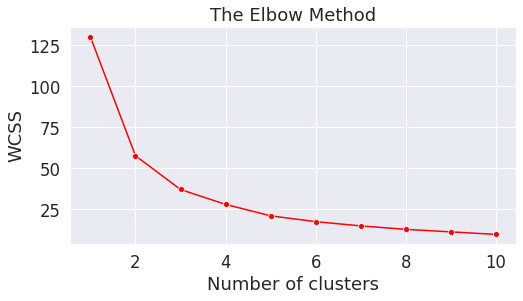

In [139]:
sns.set(context="notebook",palette = "Spectral", style = 'darkgrid', font_scale = 1.5, color_codes = True)
mat.figure(figsize=(8,4)) #figure size
sns.lineplot(range(1,11), wcss, marker = 'o', color = 'red')
mat.title('The Elbow Method') #title of figure
mat.xlabel('Number of clusters') #label of x-axis
mat.ylabel('WCSS') #label of y-axis 
mat.show() #displaying the figure

In [140]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 3, 4, 4, 1, 4, 1, 4, 2, 4, 2, 2, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 4, 1, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 4, 4, 3, 1, 1, 4, 3, 3, 3,
       4, 4, 1, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1], dtype=int32)

In [141]:
unique,counts=np.unique(y_kmeans, return_counts=True)
#storing unique values in k_means and count of each unique attribute in counts 

In [142]:
print(unique) #prints unique values
print(counts) #prints count of unique values

[0 1 2 3 4]
[32 42 24 13 38]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

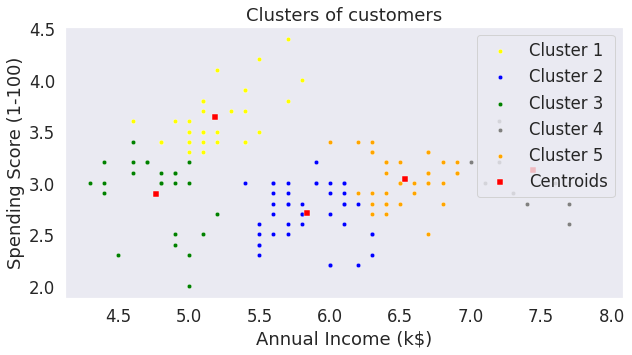

In [143]:
# Visualising the clusters
# sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
mat.figure(figsize=(10,5))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=20)
# scatterplot graph between x and y, here x is 
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=20)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=20)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=20)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=20)
sns.scatterplot(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], color = 'black', label = 'Cluster 6',s=20)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=30,marker=',')
mat.grid(False) 
mat.title('Clusters of customers')#title of graph
mat.xlabel('Annual Income (k$)') #label of x-axis
mat.ylabel('Spending Score (1-100)') #label of y-axis
mat.legend()
mat.show() # displaying figure